In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### Solução analítica

In [24]:
def u_analytical(y, t, mu, rho, U0):
    integrand = lambda x: np.exp(-x**2)
    integral, _ = quad(integrand, 0, y / (2 * np.sqrt(mu/rho * t)))
    return 1 - 2 / np.sqrt(np.pi) * integral

def plot_solution1(y_max, t_max, mu, rho, U0):
    num_points = 100 # Número de pontos ao longo de y e t
    y_vals = np.linspace(0.001, y_max, num_points)
    t_vals = np.linspace(0.001, t_max, num_points)
    Y, T = np.meshgrid(y_vals, t_vals)
    Z = np.zeros_like(Y)

    for i in range(num_points):
        for j in range(num_points):
            Z[i, j] = u_analytical(Y[i, j], T[i, j], mu,rho, U0)

        # Plot do gráfico
        plt.figure(figsize=(10, 6))
        plt.pcolormesh(T, Y, Z, cmap='jet')
        plt.colorbar(label='$\\frac{u(y, t)}{U_0}$')
        plt.xlabel('t')
        plt.ylabel('y')
        plt.title('Solução Analítica: $\\frac{u(y, t)}{U_0}$')
        txt="Solução analítica da equação diferencial parcial visualizada como um gráfico de cores."
        plt.figtext(0.5, 0.01,txt , ha="center", fontsize=12)
        plt.show()
            
def plot_solution2(y_max, t_max, mu, rho, U0):
    num_points = 100 # Número de pontos ao longo de y e t
    y_vals = np.linspace(0.001, y_max, num_points)
    t_vals = np.linspace(0.001, t_max, num_points)
    Y, T = np.meshgrid(y_vals, t_vals)
    Z = np.zeros_like(Y)
    
    for i in range(num_points):
        for j in range(num_points):
            Z[i, j] = u_analytical(Y[i, j], T[i, j], mu,rho, U0)
            
    y_cte = 0.03
    t_const1 = t_max / 4 # Valor de t = 0.5s
    t_const2 = t_max / 2 # Valor de t = 1.0s
    u_t_const1 = np.zeros_like(y_vals)
    u_t_const2 = np.zeros_like(y_vals)
    # Resultados para a velocidade nos pontos requisitados:
    u_t1 = u_analytical(y_cte, t_const1, mu, rho, U0)
    u_t2 = u_analytical(y_cte, t_const2, mu, rho, U0)
    
    plt.figure(figsize=(11, 6))
    
    for i in range(num_points):
        u_t_const1[i] = u_analytical(y_vals[i], t_const1,mu, rho, U0)
        u_t_const2[i] = u_analytical(y_vals[i], t_const2,mu, rho, U0)
        
    plt.plot(y_vals, u_t_const1, label='t = 0.5s',linewidth=3, color='blue')
    plt.scatter(y_cte, u_analytical(y_cte, t_const1, mu,rho, U0), color='blue', s=100, label='y = 0.03 m')
    plt.plot(y_vals, u_t_const2, label='t = 1.0',linewidth=3, color='green')
    plt.scatter(y_cte, u_analytical(y_cte, t_const2, mu, rho, U0), color='green', s=100, label='y = 0.03 m')
    plt.ylabel('$u(y, t_{fixo} )$')
    plt.xlabel('y (m)')
    plt.title('Solução Analítica: $\\frac{u(y, t)}{U_0}$')
    txt="Curvas para t=0.5s e t=1.0s, indicando os pontos nas respectivas curvas para y-0.03m."
    plt.figtext(0.5, 0.01,txt , ha="center", fontsize=12)
    # Controlando a frequência dos valores da escala no eixo x
    num_ticks = 11 # Número de ticks desejado
    x_ticks = np.linspace(min(y_vals), max(y_vals), num_ticks)
    plt.xticks(x_ticks)
    plt.legend()
    plt.grid(True)
    plt.show()

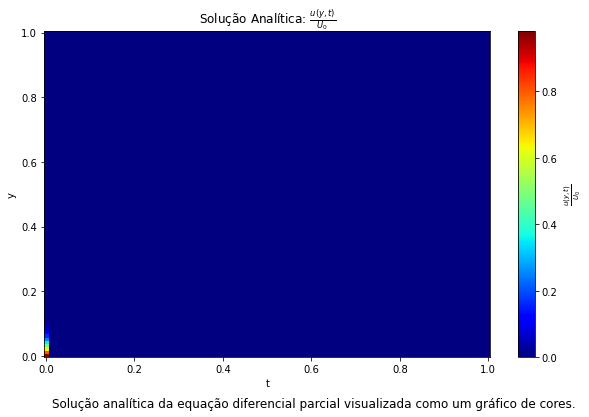

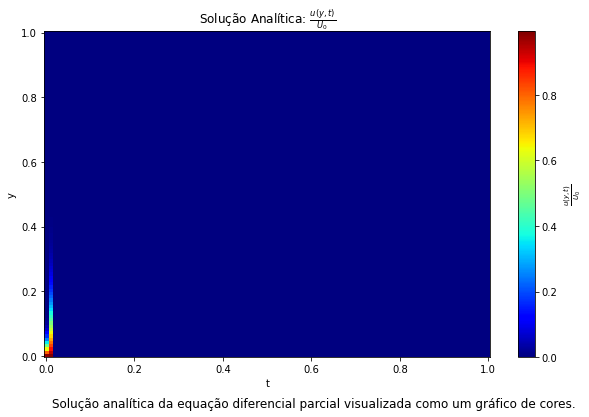

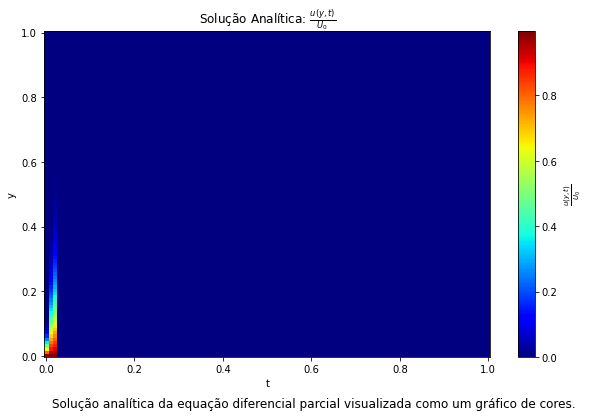

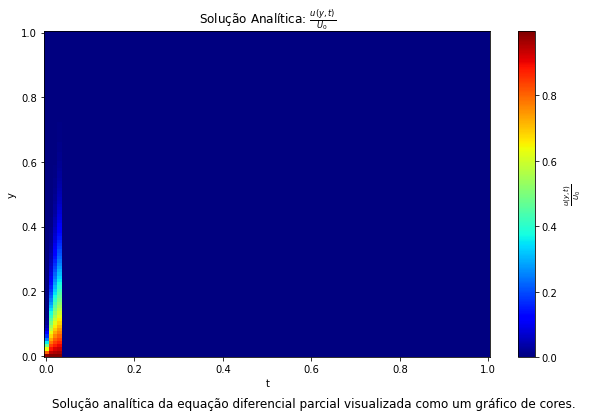

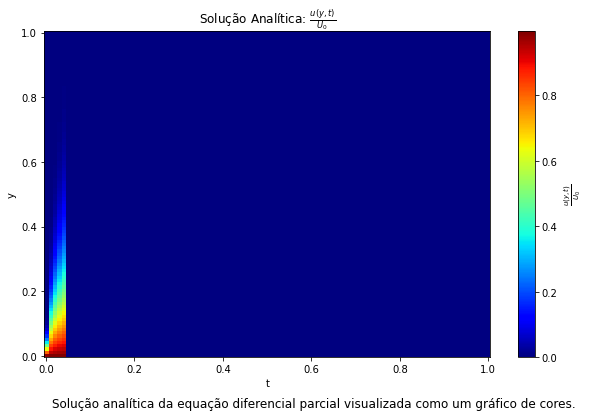

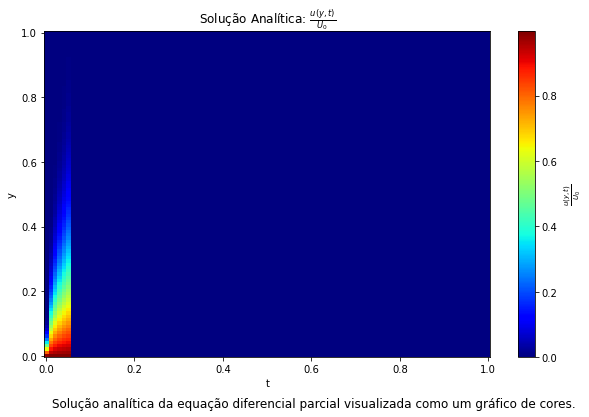

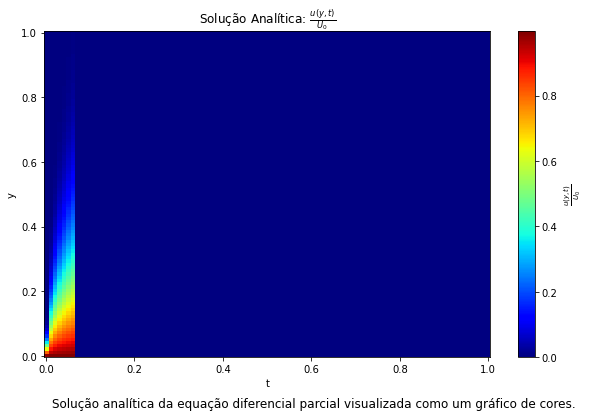

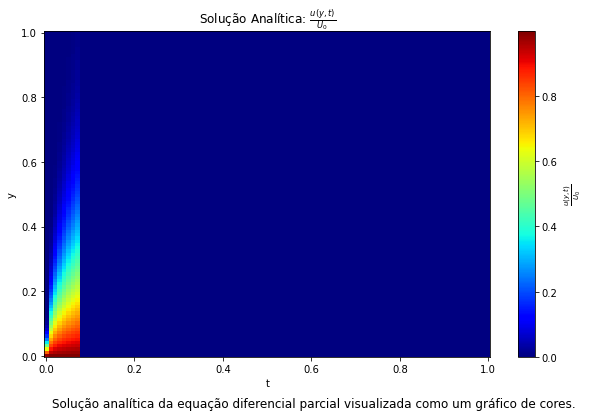

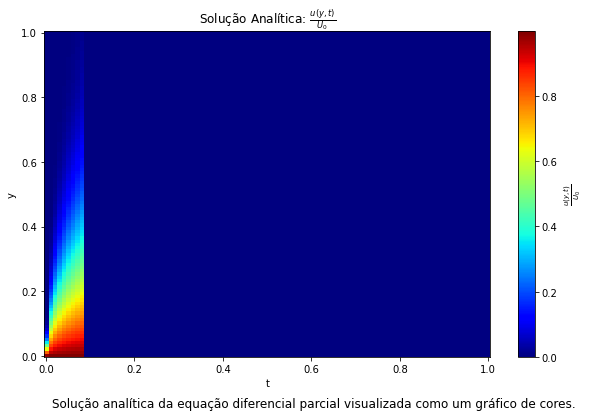

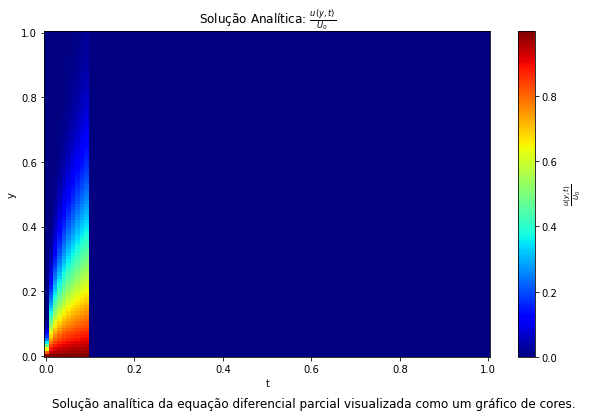

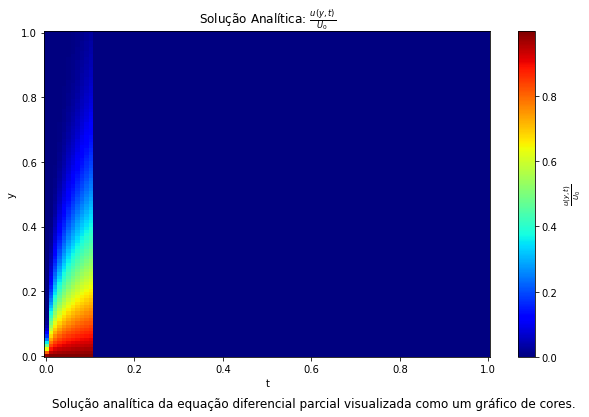

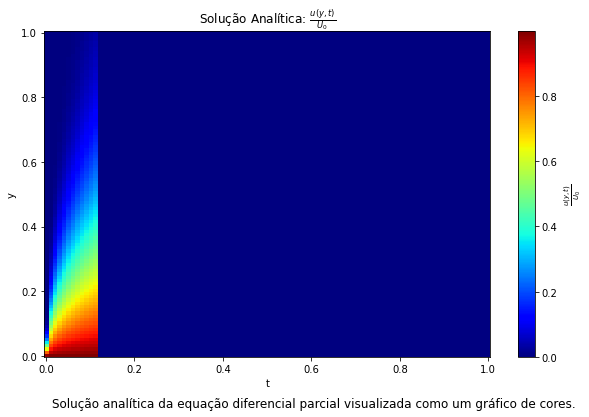

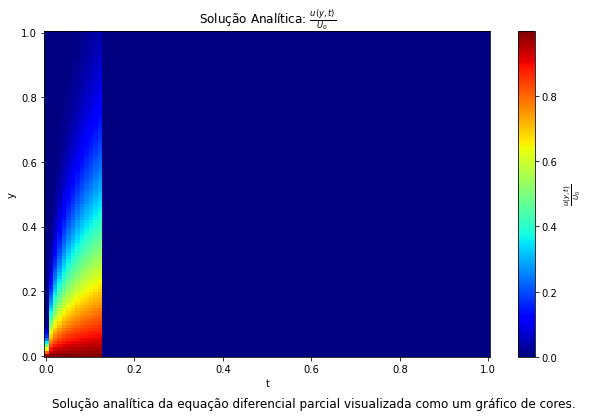

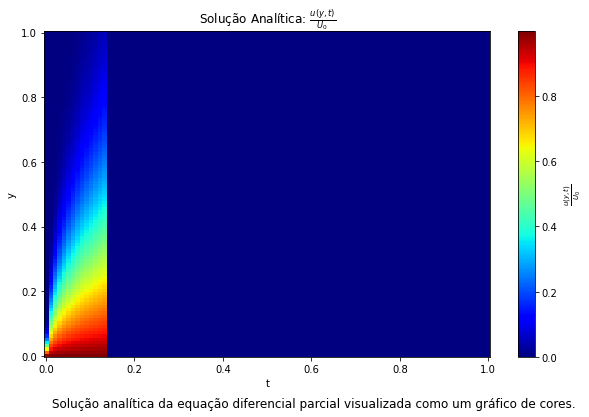

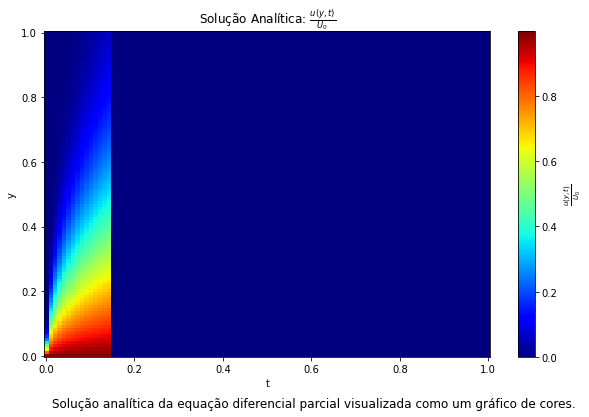

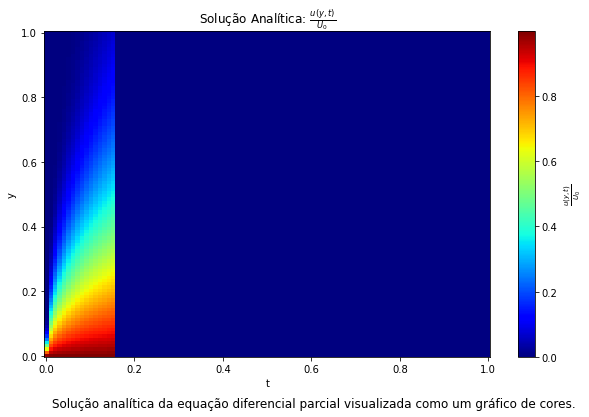

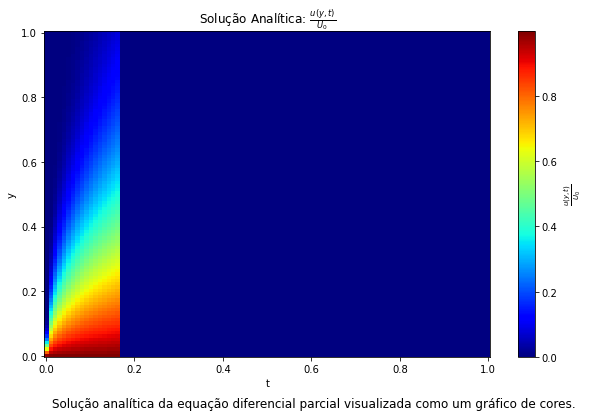

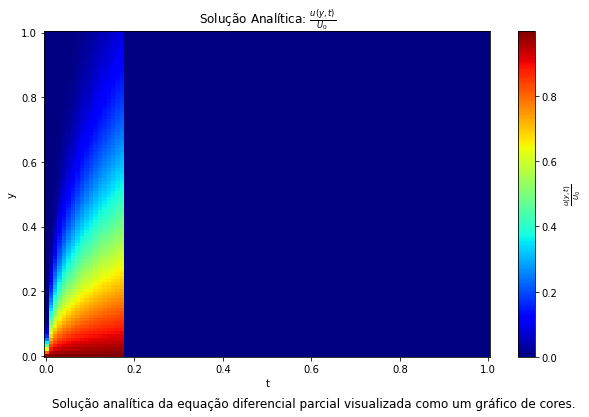

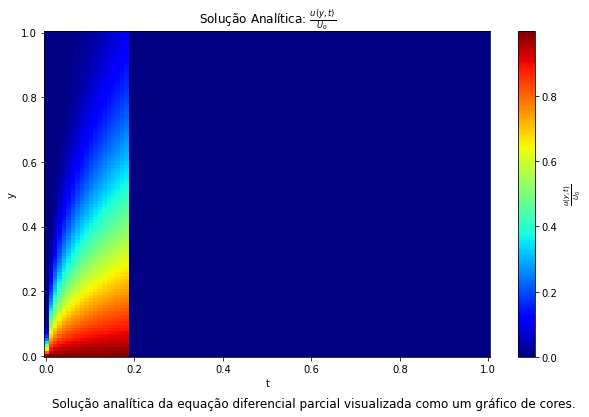

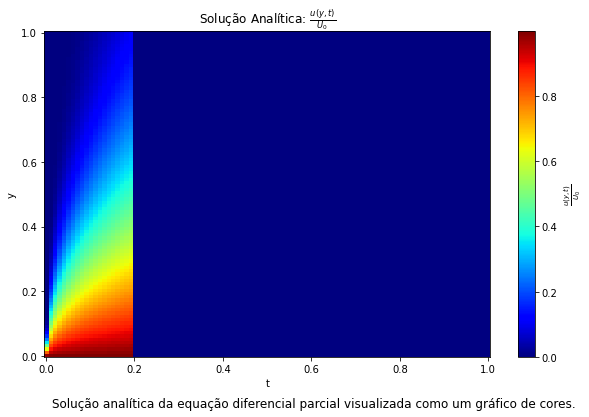

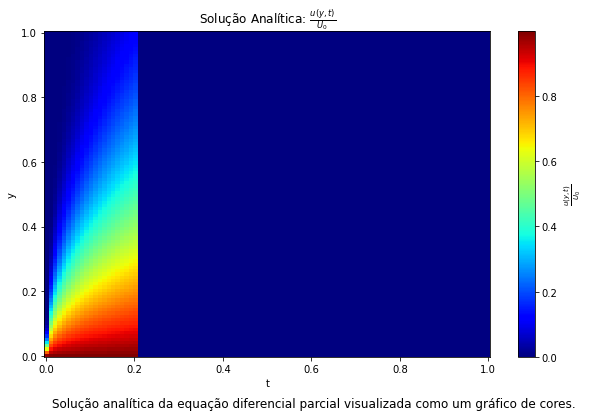

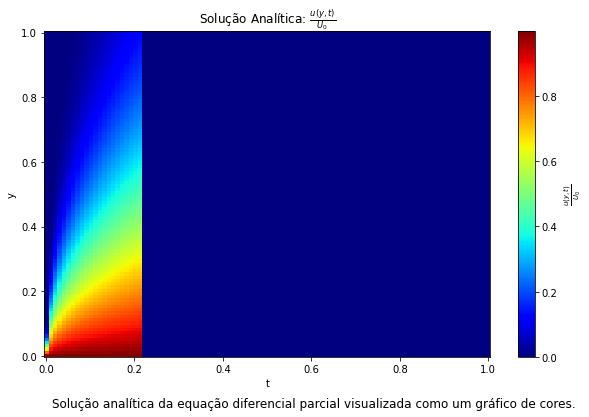

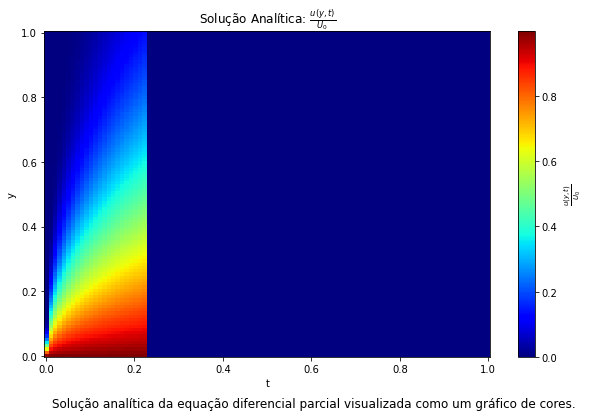

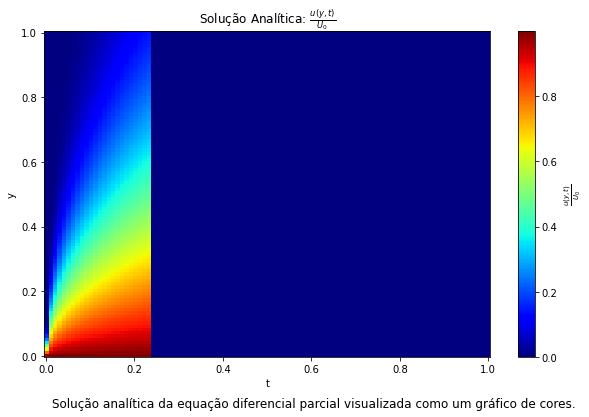

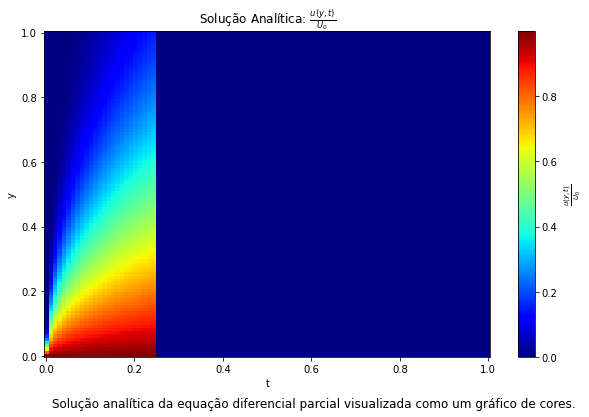

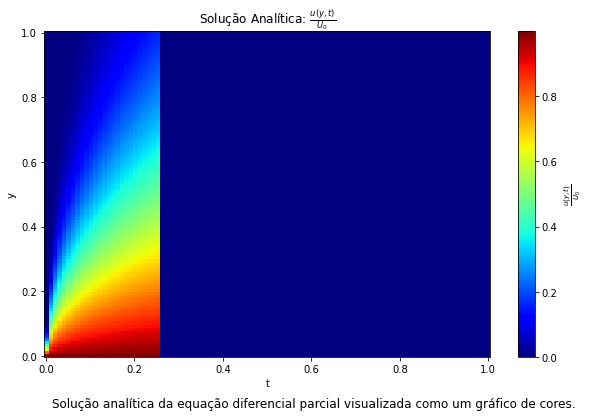

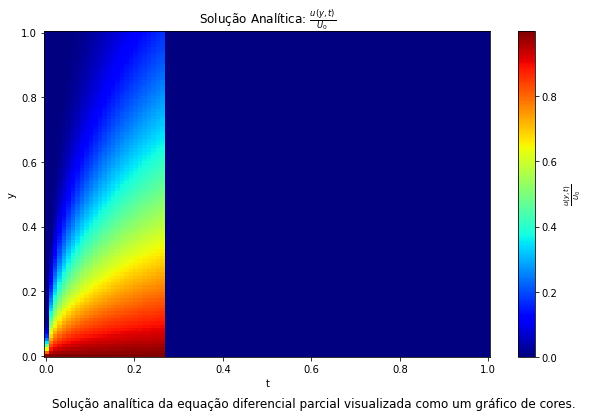

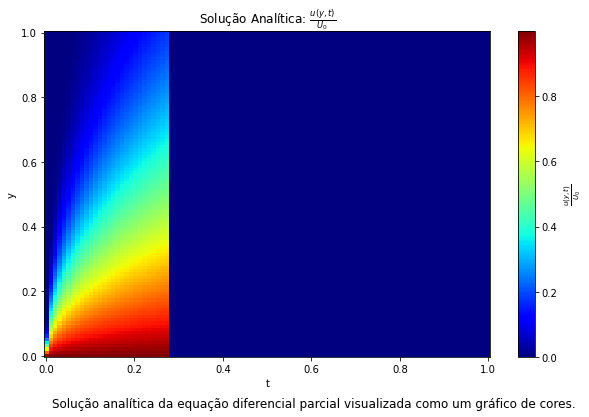

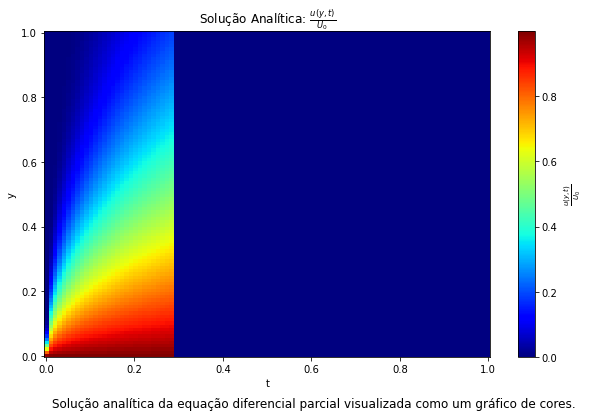

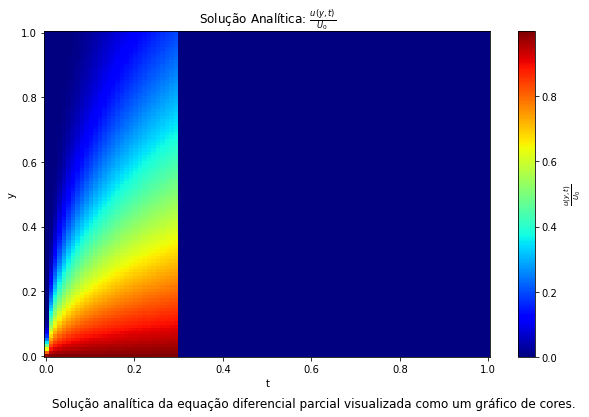

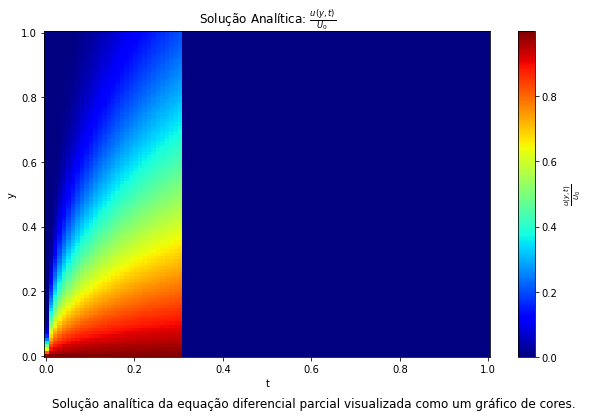

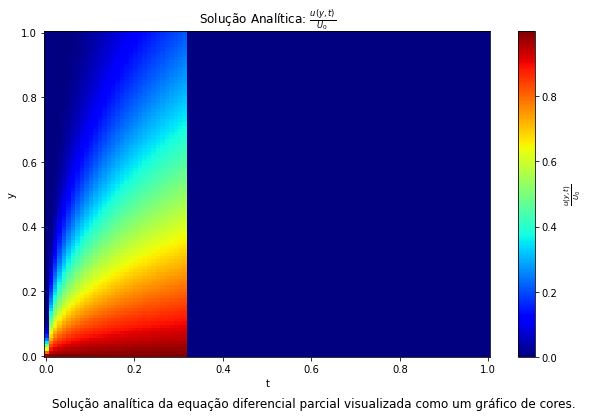

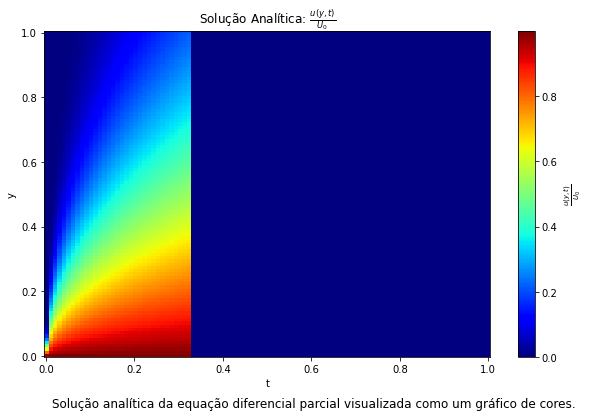

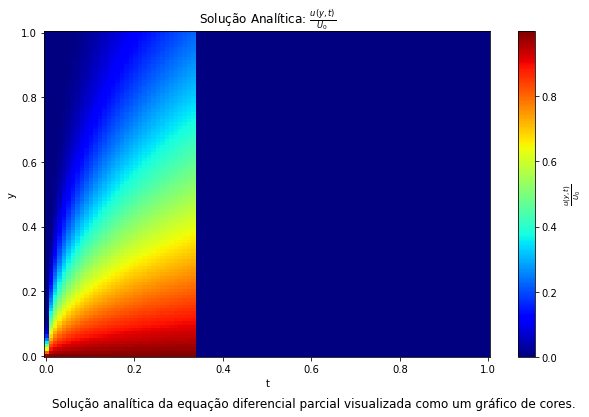

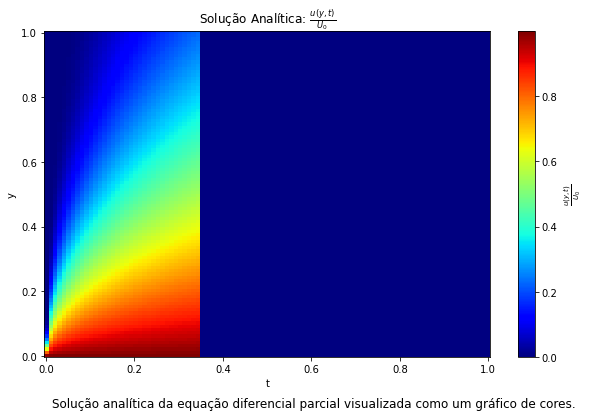

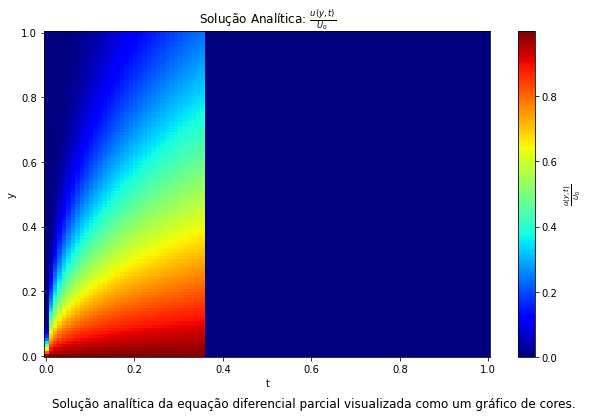

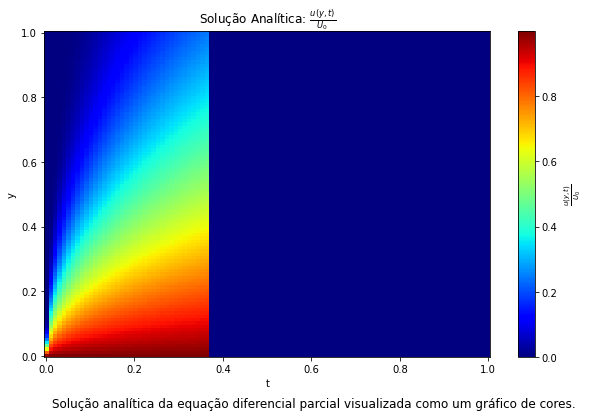

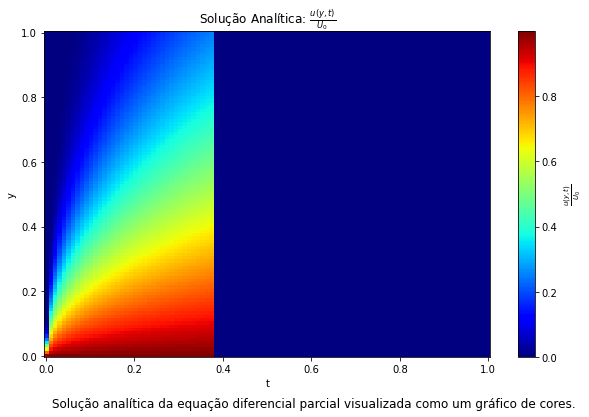

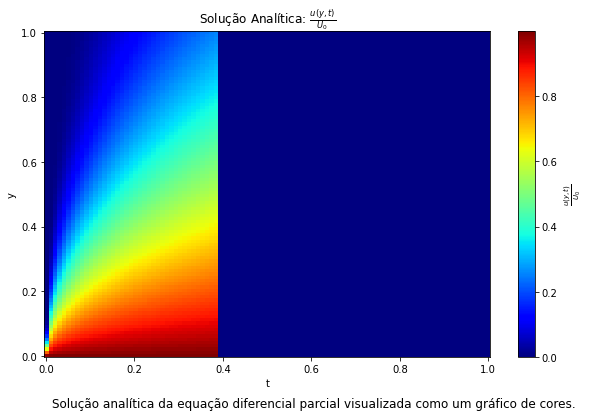

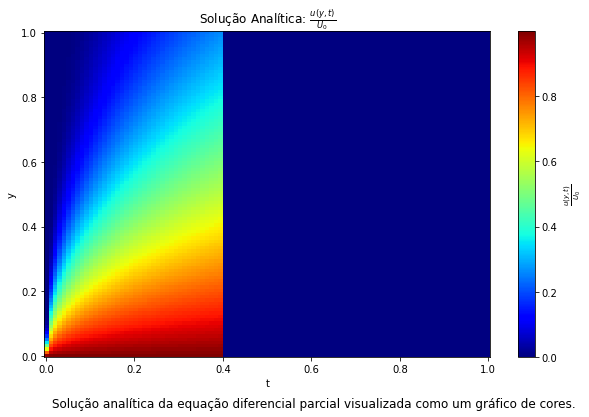

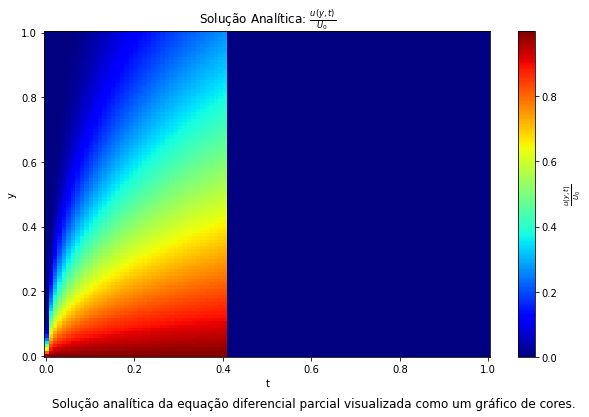

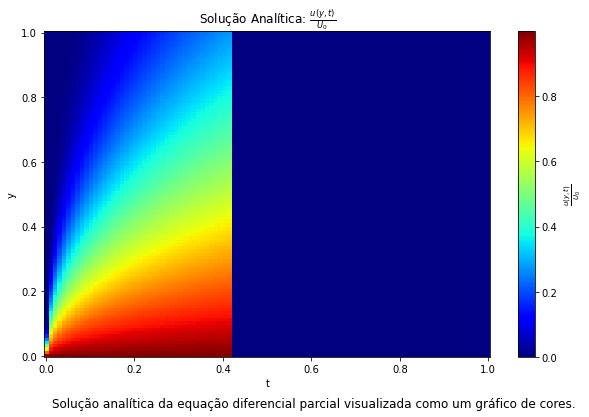

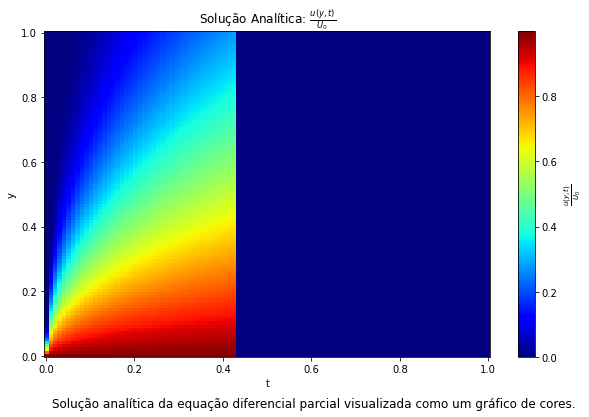

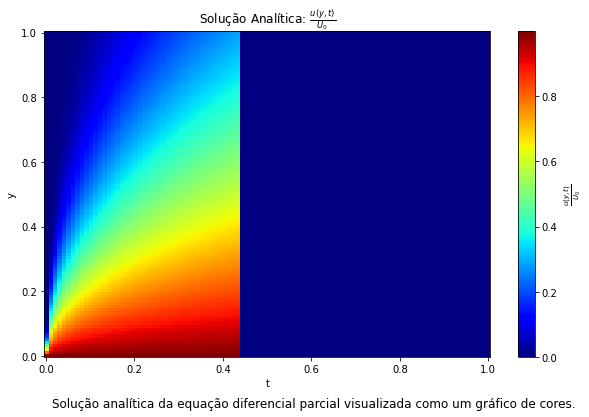

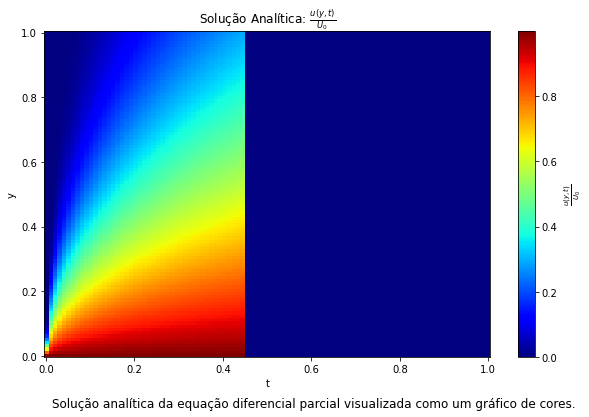

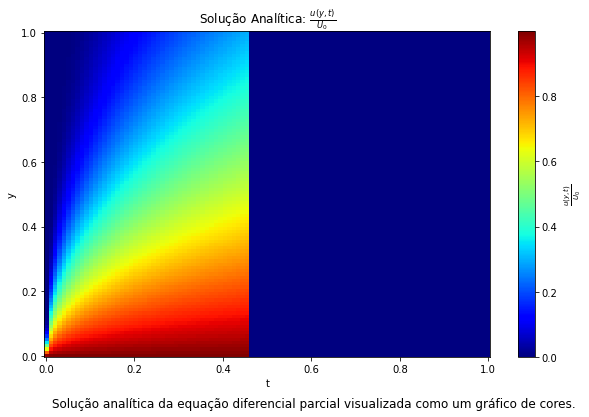

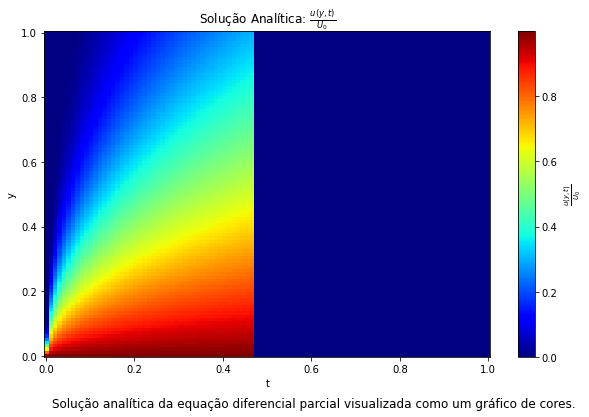

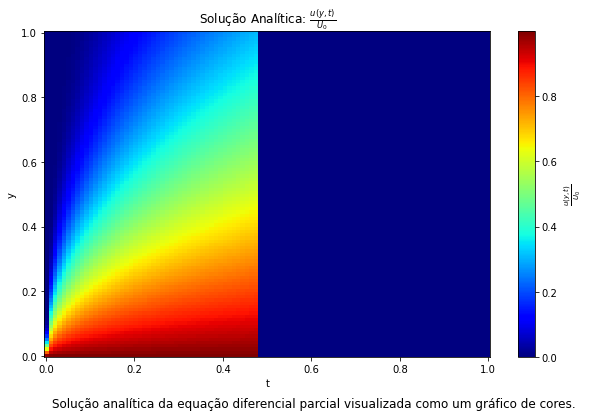

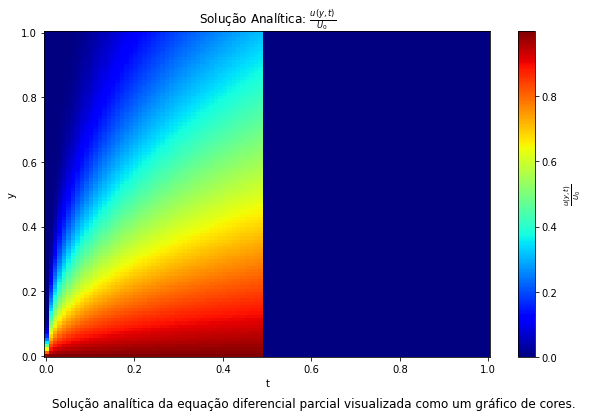

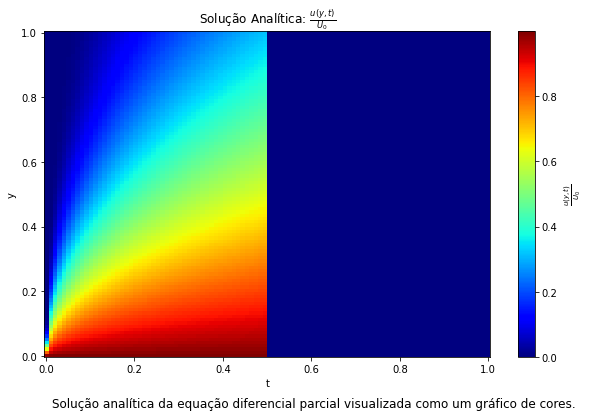

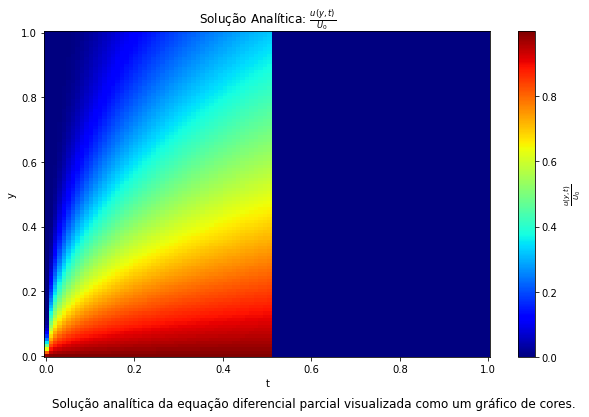

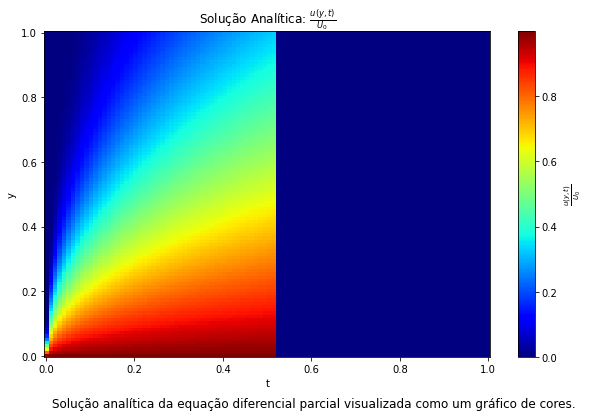

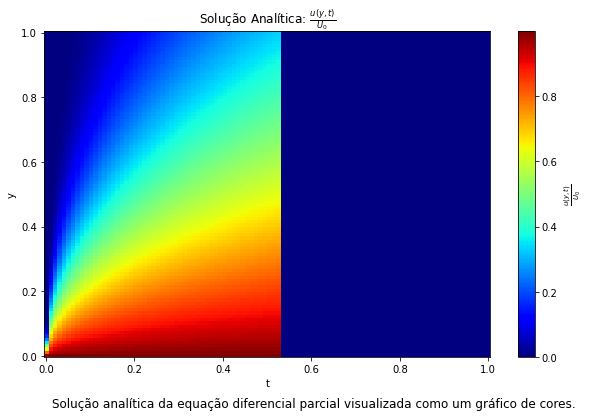

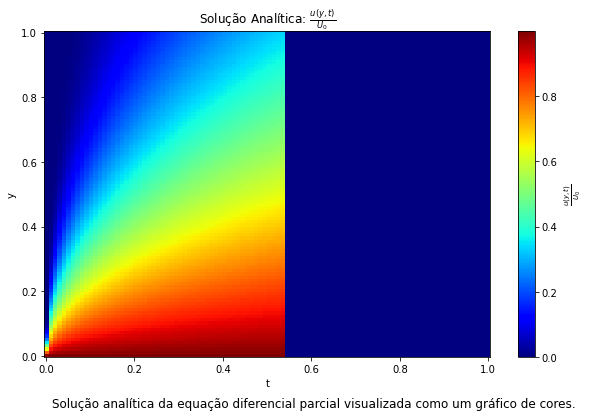

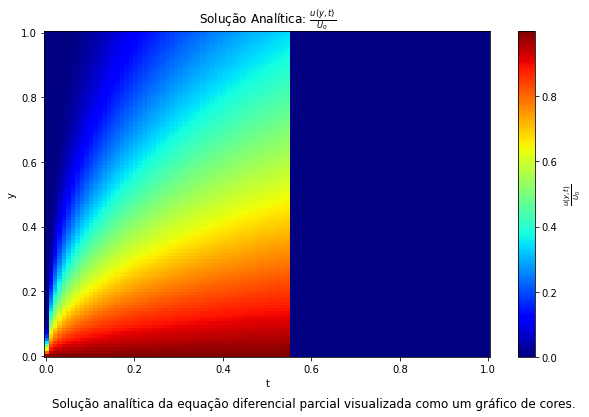

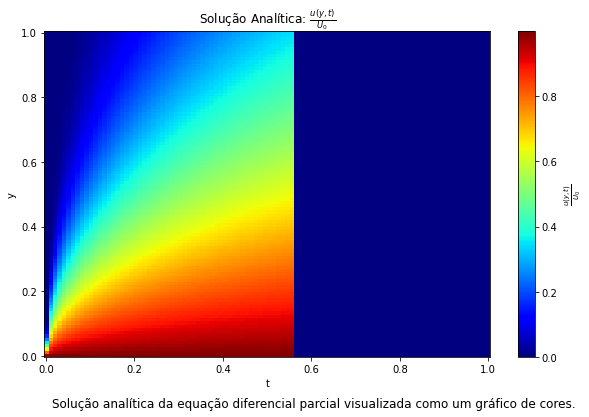

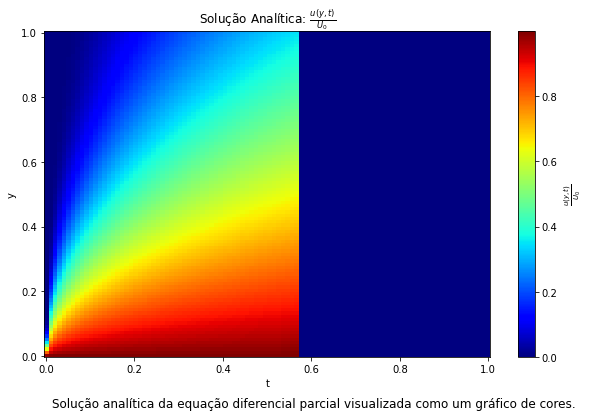

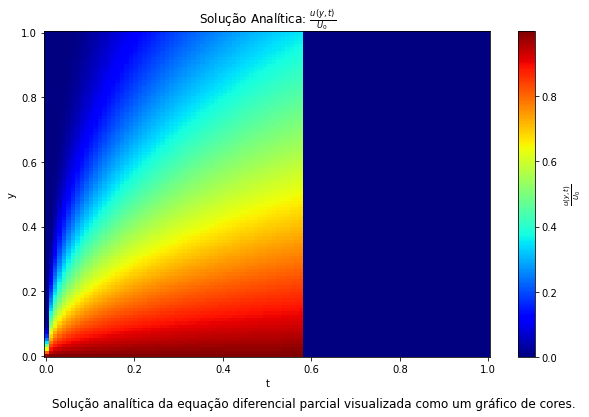

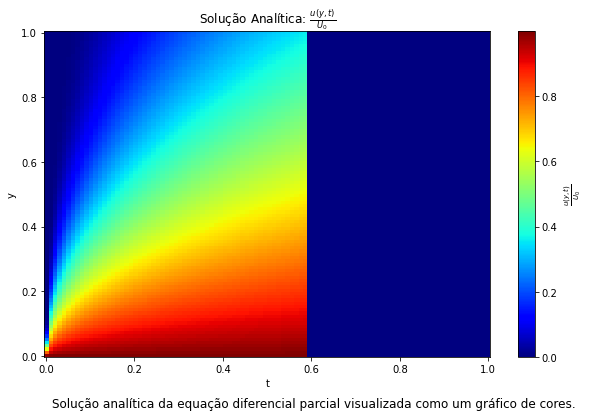

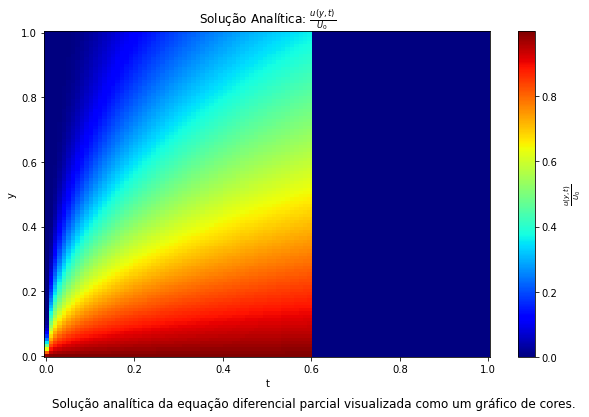

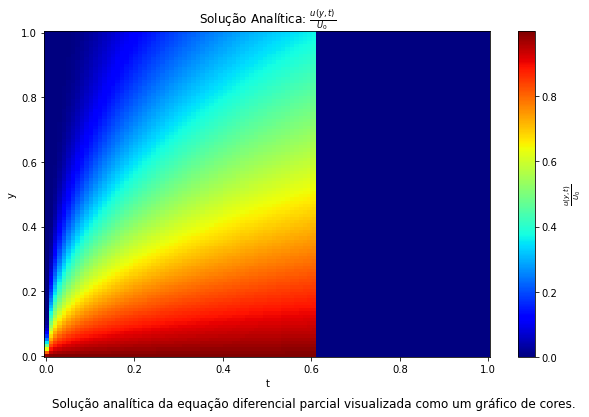

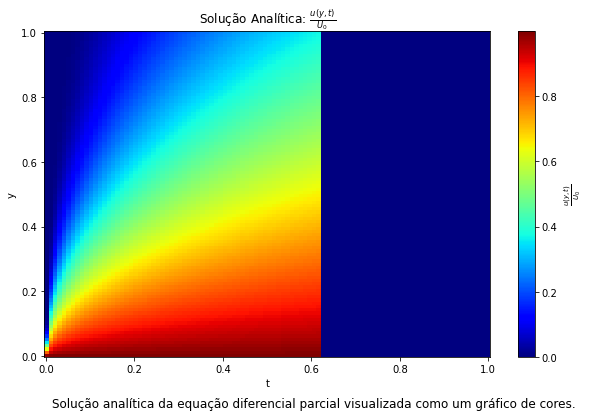

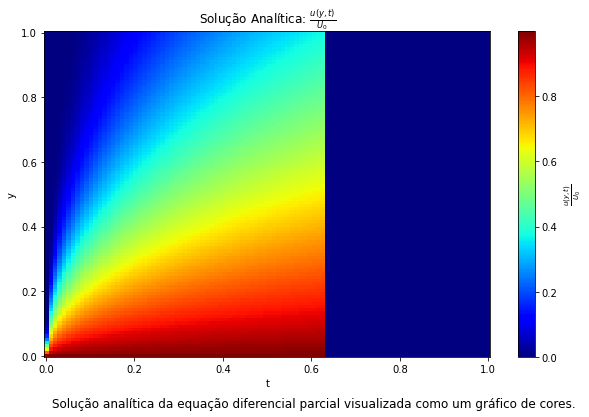

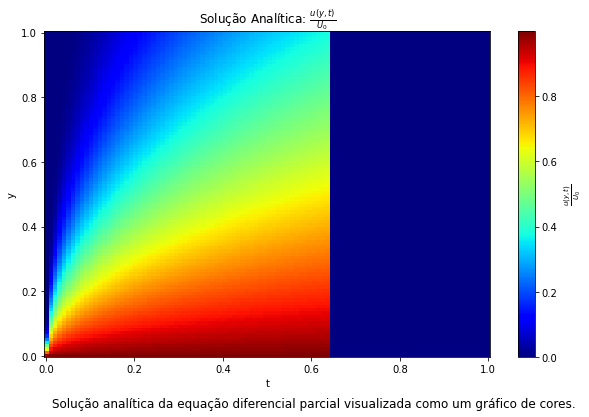

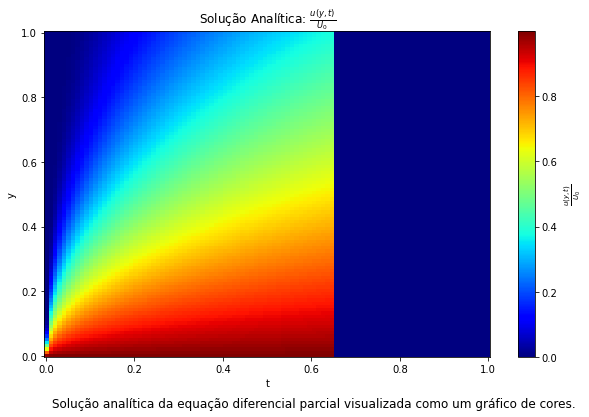

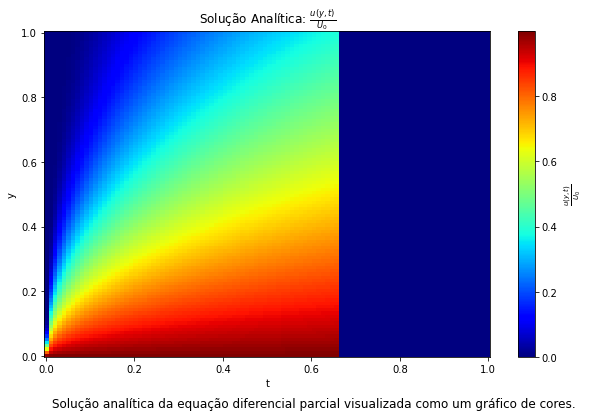

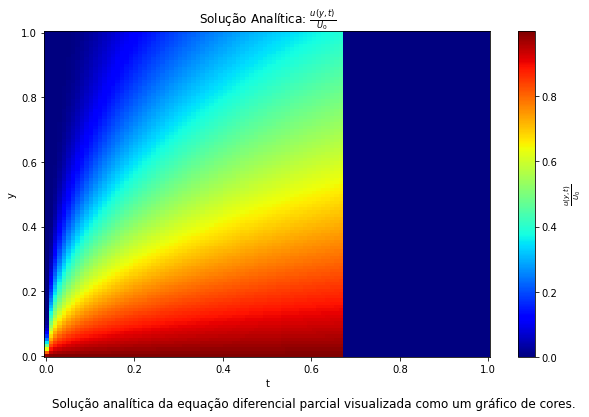

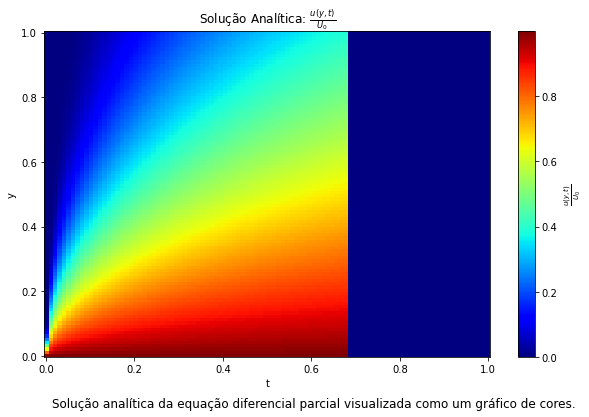

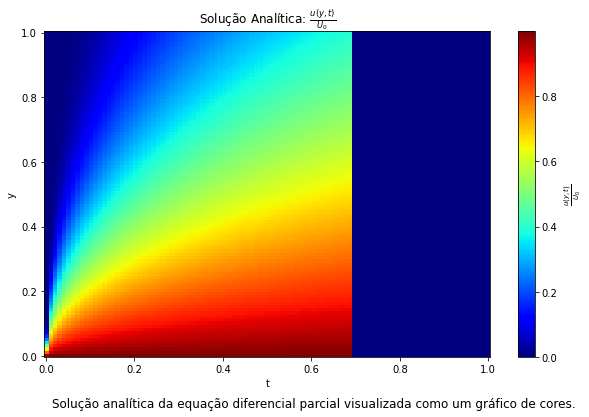

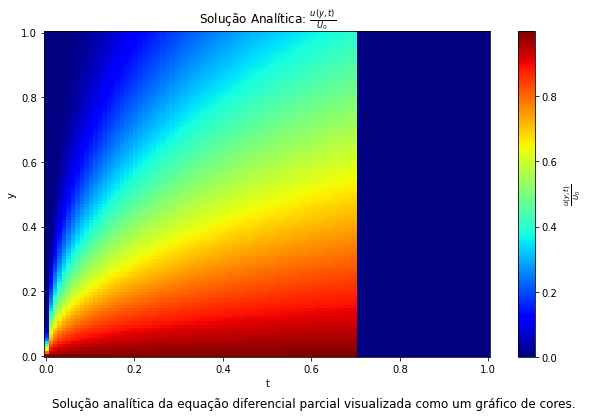

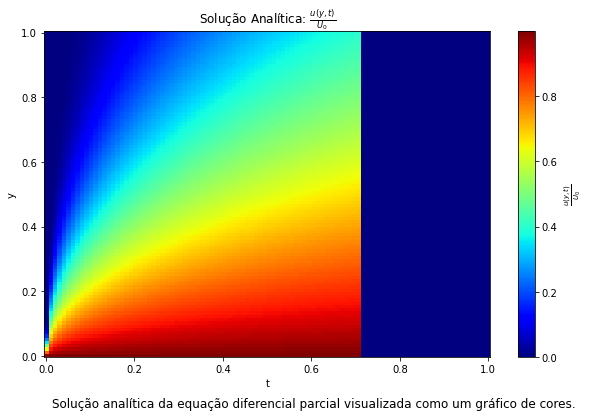

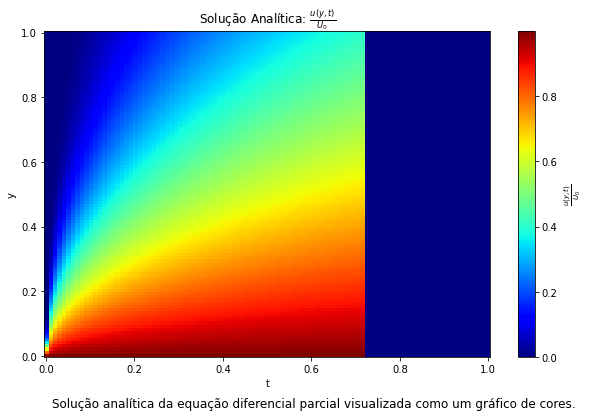

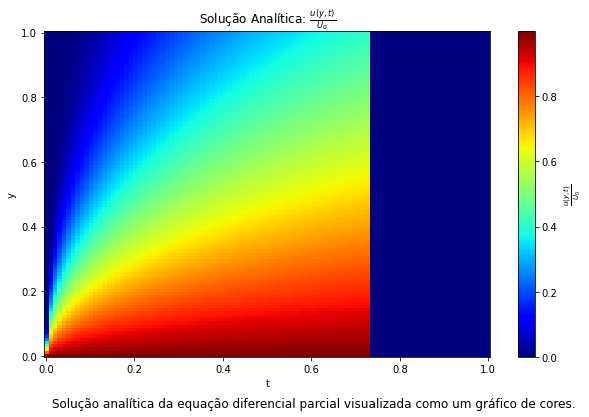

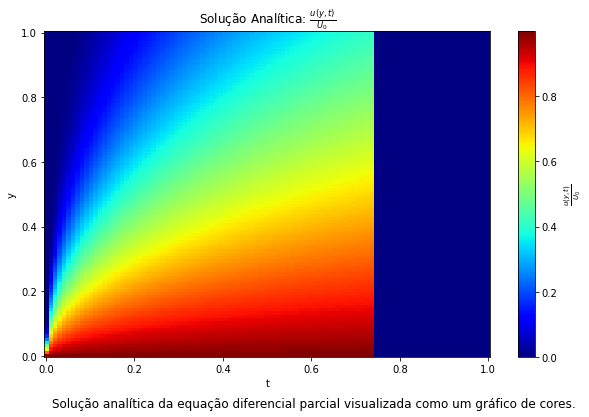

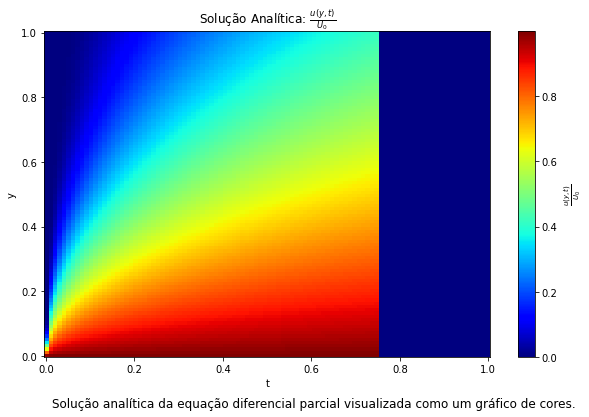

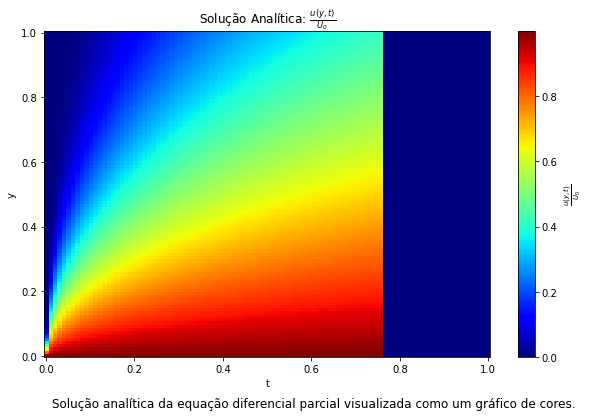

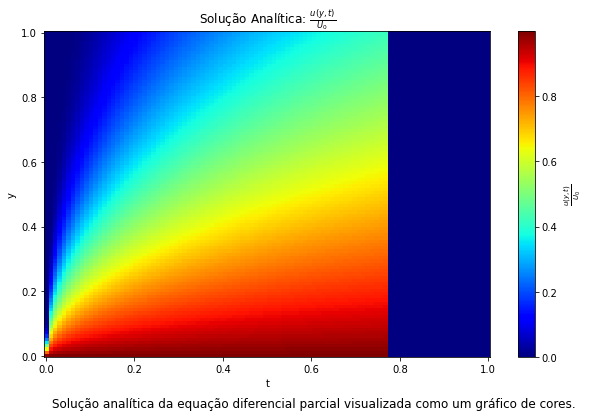

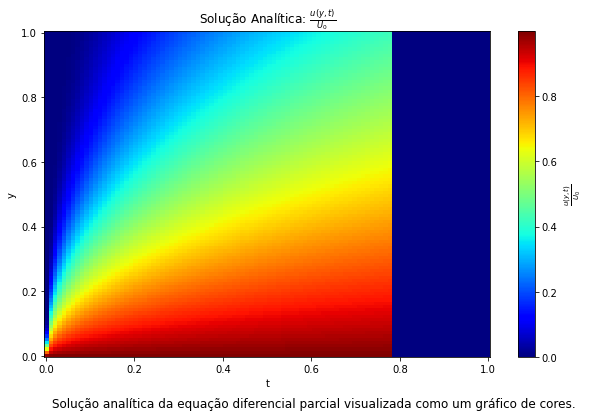

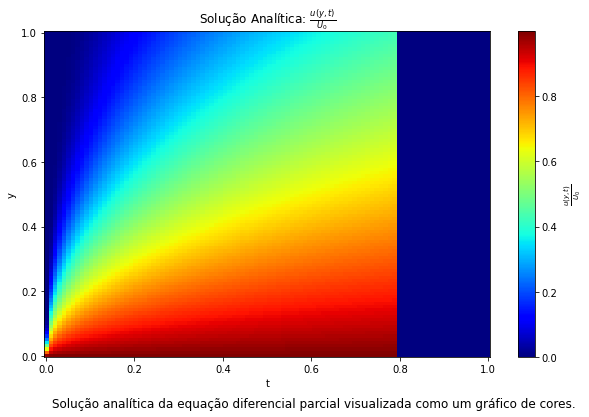

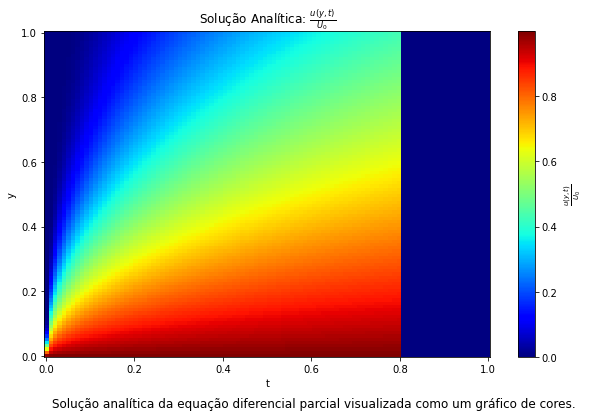

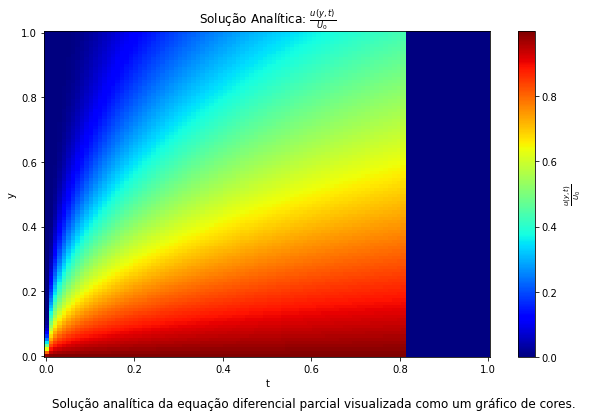

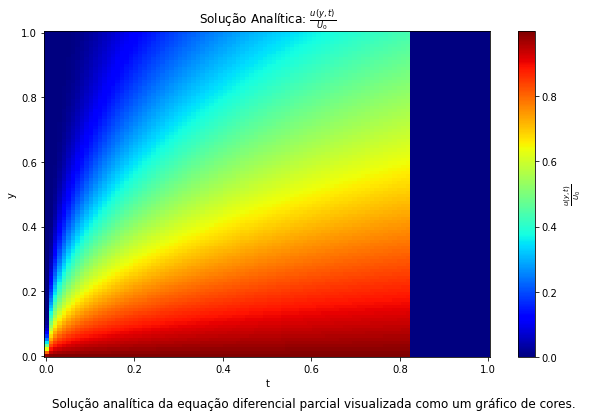

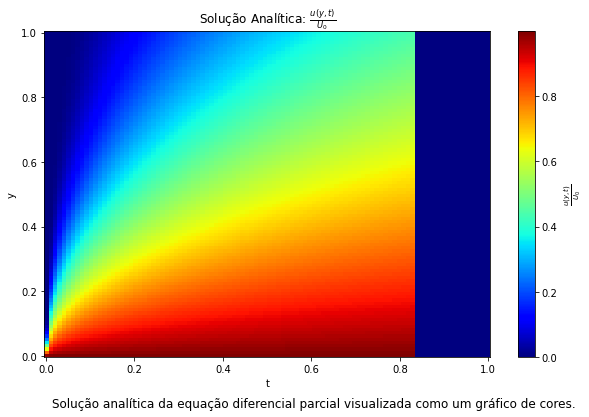

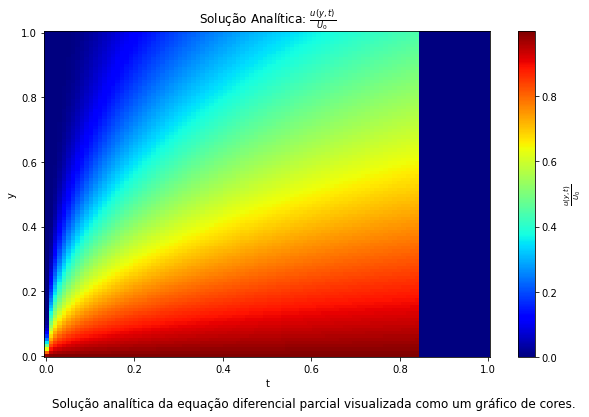

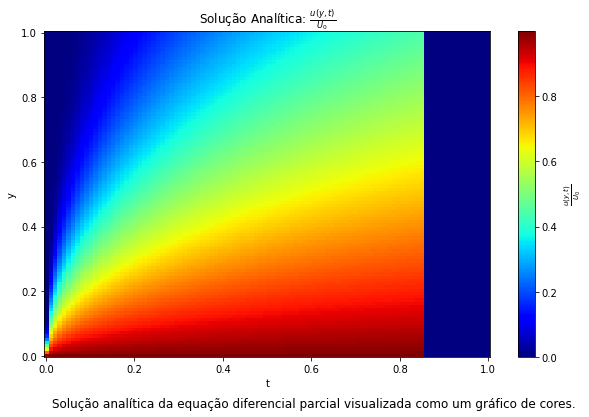

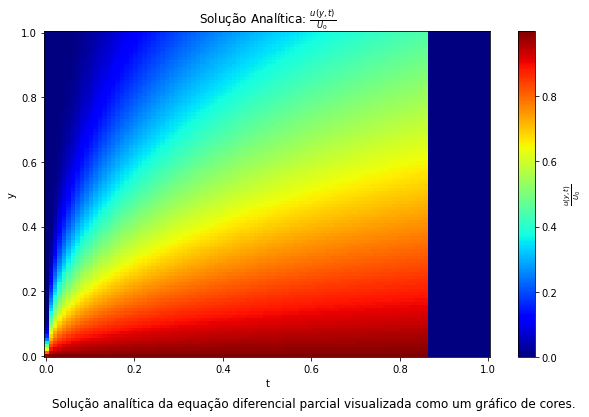

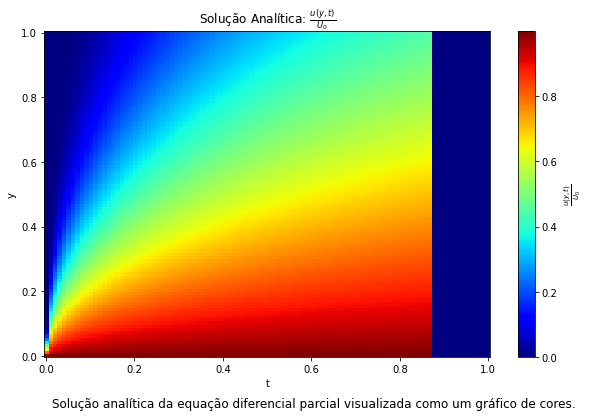

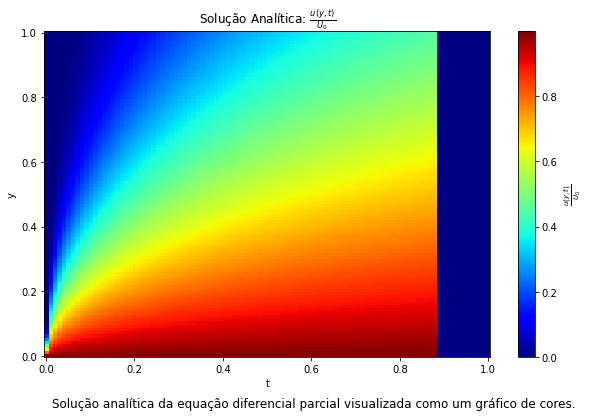

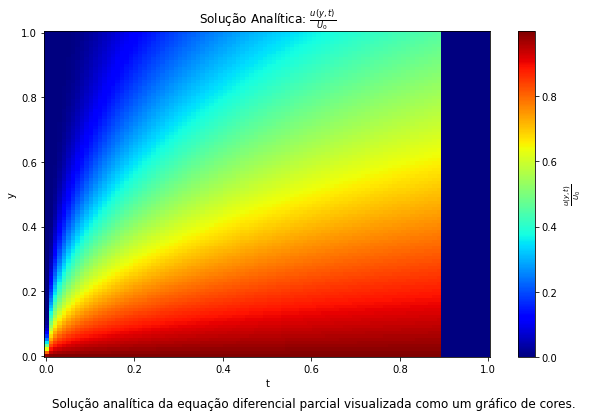

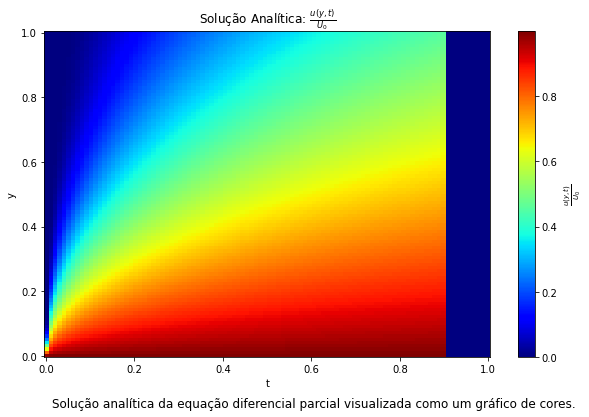

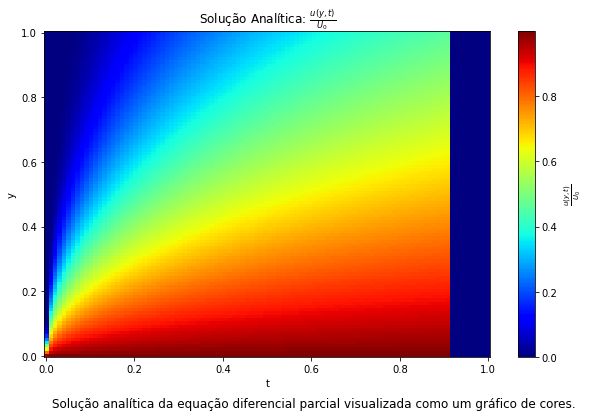

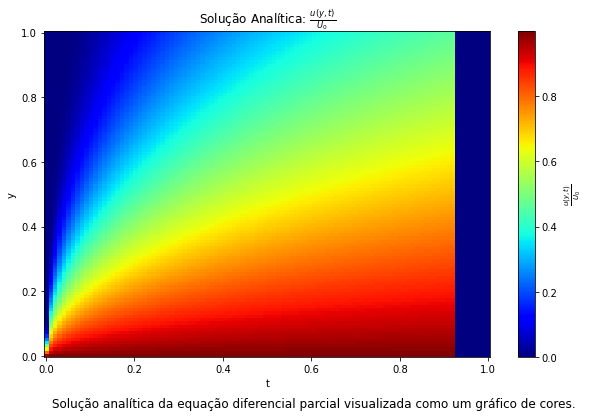

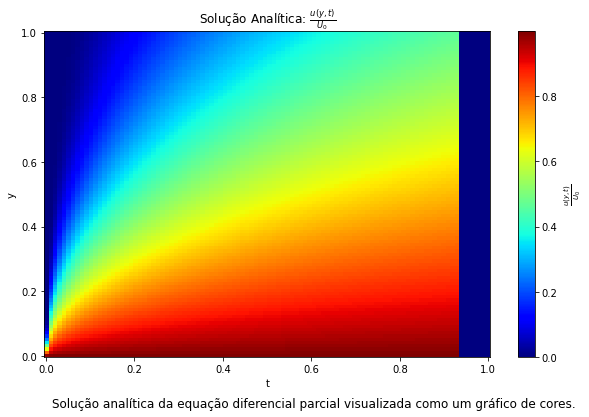

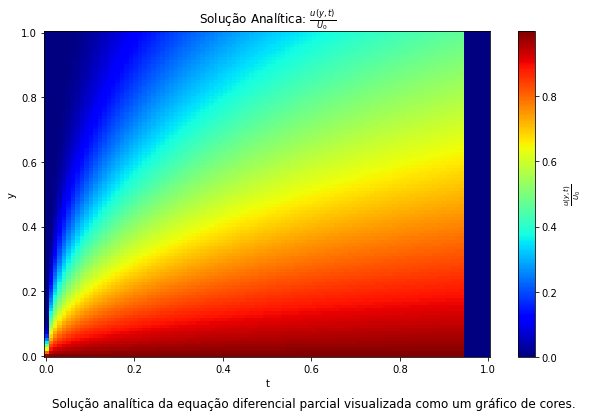

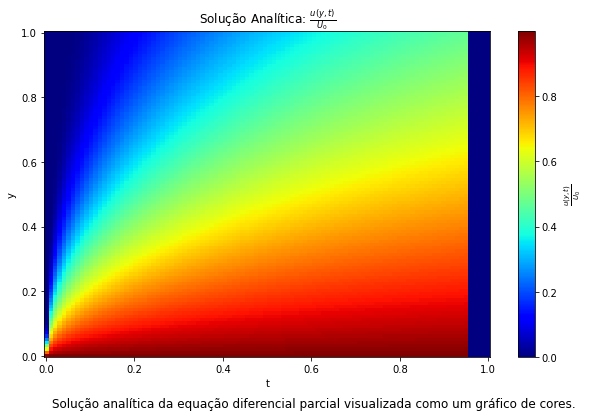

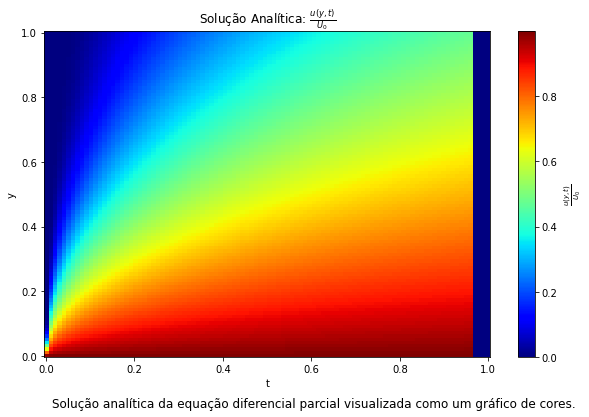

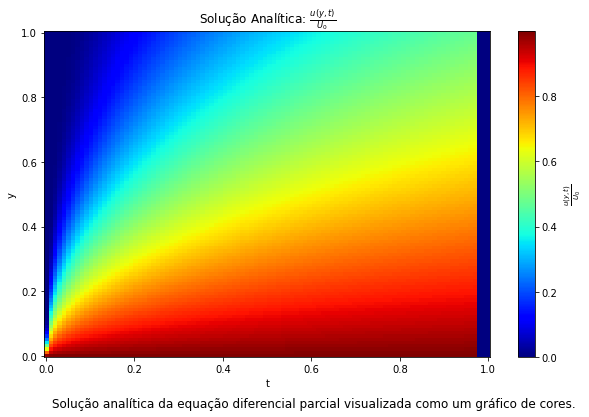

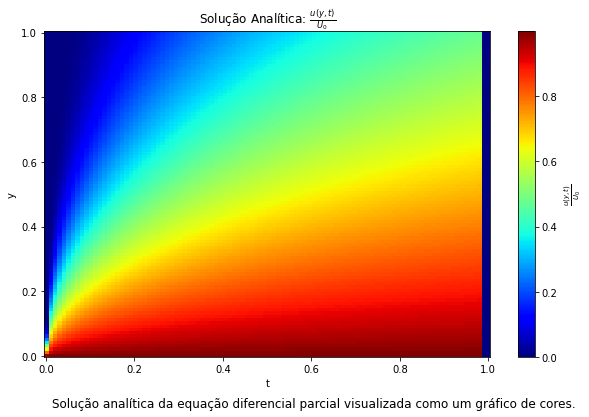

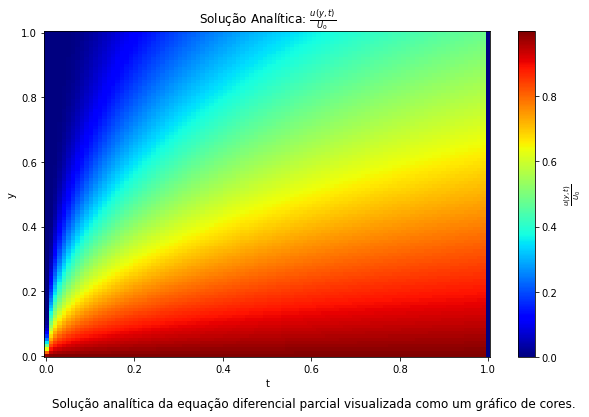

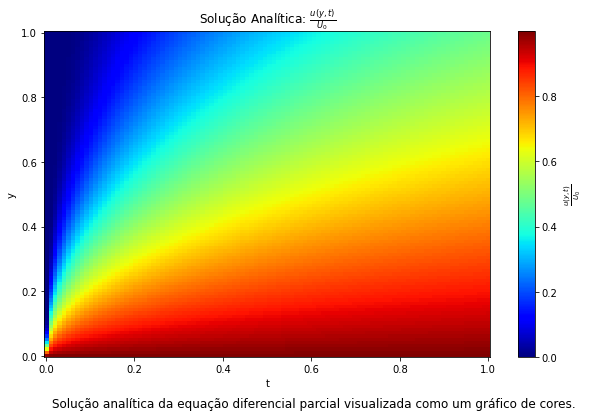

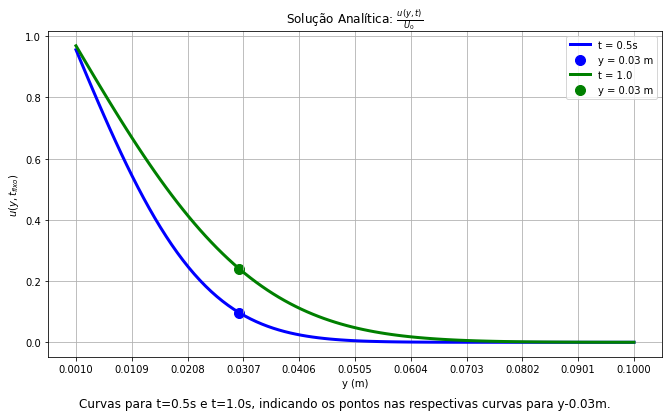

In [25]:
# Parâmetros gerais
y_max = 1.0
t_max = 1.0
mu = 1.0
rho = 1.0
U0 = 1.0

plot_solution1(y_max, t_max, mu, rho, U0)
# Parâmetros específicos para o problema
y_max = 0.1
t_max = 2.0
mu = 0.29
rho = 891.0
U0 = 1.0
# Plotagem da solução analítica
plot_solution2(y_max, t_max, mu, rho, U0)

### Solução numérica

In [27]:
def solve_diff_eq(y_max, t_max, num_pointsy, mu, rho, U0):
    # Parâmetros da malha
    dy = y_max / (num_pointsy - 1)
    dysq = dy**2
    dysq_inv = 1.0 / dysq
    dy2 = dy / 2.0
    nurho = mu / rho
    fourier = dysq / (2 * nurho)
    dt = fourier
    alpha = nurho * dt*dysq_inv
    num_pointst = int(t_max / dt) + 1
    
    # Construção da malha
    y_vals = np.arange(0, y_max + dy, dy)
    t_vals = np.arange(0, t_max + dt, dt)
    
    ny = len(y_vals)
    nt = len(t_vals)
    
    U = np.zeros([nt, ny])
    U[:, 0] = U0 # Condição inicial: u(t, y=0) = U0
    for n in range(0, nt - 1): # Iteração notempo
        for j in range(1, ny - 1): # Iteração no espaço
            U[n + 1, j] = U[n, j] + alpha * (U[n , j - 1] - 2 * U[n , j ] + U[n , j +1] )
        
    return y_vals, t_vals, U, dt, ny, nt

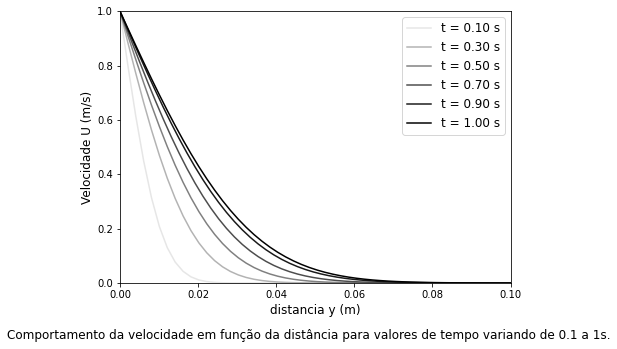

In [31]:
# Parâmetros de entrada
y_max = 0.1
t_max = 1.0
num_pointsy = 100
mu = 0.29
rho = 891
U0 = 1.0

# Resolução numérica
y_vals, t_vals, U, dt, ny, nt = solve_diff_eq(y_max, t_max, num_pointsy, mu, rho, U0)

# plotting:
plt.figure(figsize=(7,5))
plot_times = np.arange(0.1,1.0,0.2)
for t in plot_times:
    t2 = 1 - t
    plt.plot(y_vals,U[int(t/dt),:],label='t = %.2f s' %t, color='%.2f' %t2)
    plt.legend(fontsize=12)
    
t = 1.0
t2 = 1 - t
plt.plot(y_vals,U[int(t/dt),:],label='t = %.2f s' %t, color='%.2f' %t2)
plt.legend(fontsize=12)
plt.xlabel('distancia y (m)',fontsize=12)
plt.ylabel('Velocidade U (m/s)',fontsize=12)
txt="Comportamento da velocidade em função da distância para valores de tempo variando de 0.1 a 1s."
plt.figtext(0.5, -0.03,txt , ha="center", fontsize=12)
plt.axis([0,y_max,0,U0])

#Plot da solução
T, Y = np.meshgrid(t_vals, y_vals)
Z = np.zeros([nt, ny])



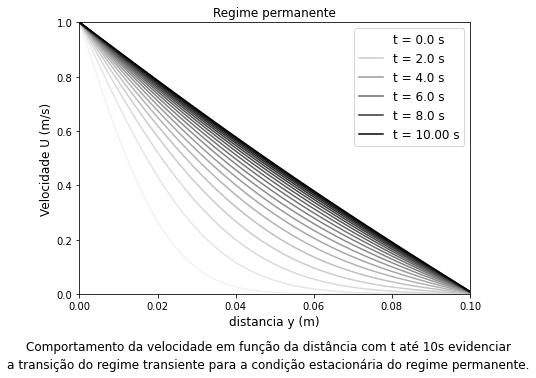

In [33]:
# Parâmetros de entrada
y_max = 0.1
t_max = 10.0
num_pointsy = 100
mu = 0.29
rho = 891
U0 = 1.0

# Resolução numérica
y_vals, t_vals, U, dt, ny, nt = solve_diff_eq(y_max, t_max, num_pointsy, mu, rho, U0)

# plotting:
plt.figure(figsize=(7,5))
plot_times = np.arange(0.0,10.0,0.5)
for t in plot_times:
    t1 = t/10
    t2 = 1 - t1
    if(t % 2 == 0):
        plt.plot(y_vals,U[int(t/dt),:],label='t = %.1f s' %t, color='%.2f' %t2)
    else:
        plt.plot(y_vals,U[int(t/dt),:], color='%.2f' %t2)
    plt.legend(fontsize=12)
    
t = 10.0
t2 = 10 - t
plt.plot(y_vals,U[int(t/dt),:],label='t = %.2f s' %t, color='%.2f' %t2)
plt.legend(fontsize=12)
plt.xlabel('distancia y (m)',fontsize=12)
plt.ylabel('Velocidade U (m/s)',fontsize=12)
plt.axis([0,y_max,0,U0])

plt.title('Regime permanente')
txt="Comportamento da velocidade em função da distância com t até 10s evidenciar"
txt2="a transição do regime transiente para a condição estacionária do regime permanente."
plt.figtext(0.5, -0.03,txt , ha="center", fontsize=12)
plt.figtext(0.5, -0.08,txt2 , ha="center", fontsize=12)

#Plot da solução
T, Y = np.meshgrid(t_vals, y_vals)
Z = np.zeros([nt, ny])